# PPatel WeatherPy
----


In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [72]:
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [118]:
# Build partial query URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_url = f"{base_url}appid={weather_api_key}&units={units}&q="

city_info = []

for city in cities:
    try:
        weather_data = requests.get(weather_url+city).json()
        country = weather_data['sys']['country']
        lat = weather_data['coord']['lat']
        lon = weather_data['coord']['lon']
        temp = weather_data['main']['temp']
        humidity = weather_data['main']['humidity']
        cloudiness = weather_data['clouds']['all']
        windspeed = weather_data['wind']['speed']
        print(f"Processing Record {city}")
    except KeyError:
        print(f"Some data not found. Skipping {city}")
        continue
    city_dict = {
            "city": city,
            "country": country,
            "lat": lat,
            "lon": lon,
            "temp": temp,
            "humidity": humidity,
            "cloudiness": cloudiness,
            "windspeed": windspeed}
    city_info.append(city_dict)
    
#pprint(weather_data)

Processing Record san cristobal
Processing Record ola
Some data not found. Skipping sorvag
Processing Record san patricio
Processing Record takayama
Processing Record corralillo
Processing Record nizwa
Processing Record punta arenas
Processing Record atuona
Some data not found. Skipping malwan
Processing Record emilio carranza
Processing Record busselton
Processing Record bronnoysund
Processing Record yellowknife
Processing Record fayetteville
Processing Record bredasdorp
Processing Record mataura
Processing Record khatanga
Processing Record rikitea
Processing Record zanjan
Processing Record bethel
Processing Record upernavik
Processing Record devonport
Processing Record albany
Processing Record lorengau
Processing Record glendive
Processing Record roma
Processing Record kapaa
Processing Record lebu
Processing Record chuy
Processing Record saskylakh
Some data not found. Skipping grand river south east
Processing Record cherat
Processing Record tiksi
Some data not found. Skipping illoqq

Processing Record gumrak
Processing Record kulhudhuffushi
Processing Record jasper
Processing Record torbay
Processing Record bathsheba
Processing Record ponot
Processing Record butaritari
Some data not found. Skipping viligili
Processing Record taksimo
Processing Record salym
Processing Record namatanai
Processing Record bilma
Processing Record provideniya
Processing Record grindavik
Processing Record touros
Processing Record riyadh
Processing Record auki
Processing Record bideford
Processing Record rio grande
Processing Record katsuura
Processing Record inhambane
Processing Record boddam
Processing Record beyneu
Some data not found. Skipping sukhoverkovo
Processing Record muzhi
Processing Record henties bay
Processing Record klaksvik
Processing Record gigmoto
Processing Record ust-tsilma
Processing Record wajid
Processing Record pandan
Processing Record katangli
Processing Record sisimiut
Processing Record pinega
Processing Record hami
Processing Record tulun
Processing Record heihe


Processing Record narsaq
Processing Record clinton
Processing Record breytovo
Processing Record gazanjyk
Processing Record anchorage
Processing Record panzhihua
Processing Record kysyl-syr
Processing Record marabba
Processing Record isangel
Processing Record baker city
Processing Record barrhead
Some data not found. Skipping jiddah
Processing Record guilin
Some data not found. Skipping jiroft
Processing Record santa maria
Processing Record elat
Processing Record ambilobe
Processing Record mikun
Processing Record galan
Processing Record batemans bay
Processing Record aguascalientes
Processing Record markova
Processing Record bubaque
Processing Record stykkisholmur
Processing Record omsukchan
Processing Record leh
Processing Record yertarskiy
Processing Record cockburn town
Some data not found. Skipping yeletskiy
Processing Record vanavara
Some data not found. Skipping barawe
Processing Record pondicherry
Processing Record vanino
Processing Record diffa
Processing Record khani
Some data 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [119]:
weather_df = pd.DataFrame(city_info)
weather_df.count()

city          583
country       583
lat           583
lon           583
temp          583
humidity      583
cloudiness    583
windspeed     583
dtype: int64

In [120]:
weather_df.head()

,city,country,lat,lon,temp,humidity,cloudiness,windspeed
0,san cristobal,VE,7.77,-72.22,84.20,54,20,8.05
1,ola,RU,59.58,151.28,24.44,93,80,19.44
2,san patricio,MX,19.22,-104.70,82.40,65,5,17.22
3,takayama,JP,36.13,137.25,32.86,66,90,3.42
4,corralillo,CU,22.98,-80.59,75.16,71,0,17.20


In [121]:
weather_df.to_csv("./weatherdata.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

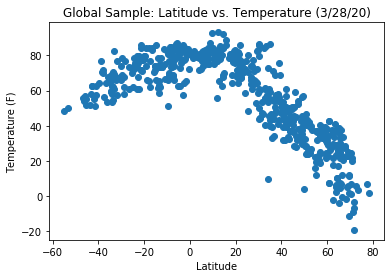

In [122]:
x_values = weather_df['lat']
y_values = weather_df['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Global Sample: Latitude vs. Temperature (3/28/20)')

plt.savefig("./LatvsTemp.png")

#### Latitude vs. Humidity Plot

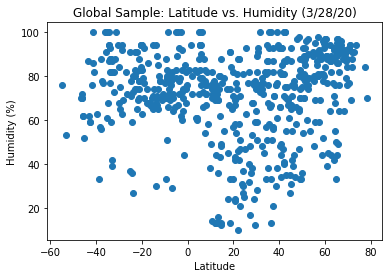

In [123]:
x_values = weather_df['lat']
y_values = weather_df['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Global Sample: Latitude vs. Humidity (3/28/20)')

plt.savefig("./LatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

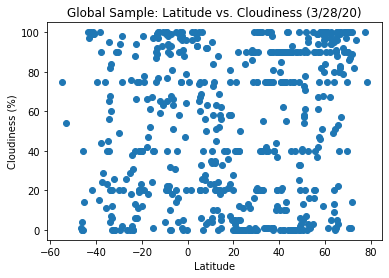

In [124]:
x_values = weather_df['lat']
y_values = weather_df['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Global Sample: Latitude vs. Cloudiness (3/28/20)')

plt.savefig("./LatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

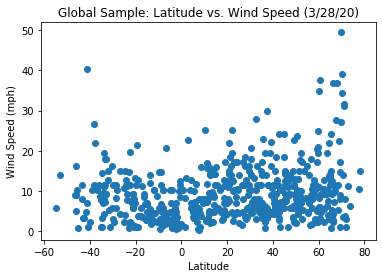

In [125]:
x_values = weather_df['lat']
y_values = weather_df['windspeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Global Sample: Latitude vs. Wind Speed (3/28/20)')

plt.savefig("./LatvsWindspeed.png")

## Linear Regression

In [126]:
# OPTIONAL: Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [127]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_cities = weather_df.loc[weather_df["lat"] > 0]
southern_hem_cities = weather_df.loc[weather_df["lat"] < 0]

####  Northern Hemisphere - Temp (F) vs. Latitude Linear Regression

The r-squared is: -0.9051005027811716


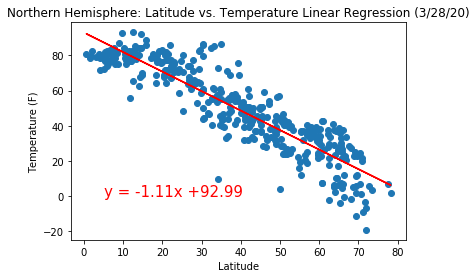

In [128]:
x_values = northern_hem_cities['lat']
y_values = northern_hem_cities['temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5,0),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Temperature Linear Regression (3/28/20)')

plt.savefig("./Regression-Northern_LatvsTemp.png")

####  Southern Hemisphere - Temp (F) vs. Latitude Linear Regression

The r-squared is: 0.6445823177806143


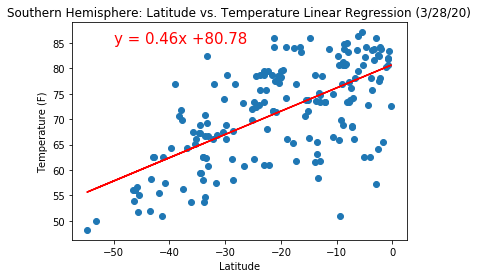

In [136]:
x_values = southern_hem_cities['lat']
y_values = southern_hem_cities['temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Temperature Linear Regression (3/28/20)')

plt.savefig("./Regression-Southern_LatvsTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28586795945419335


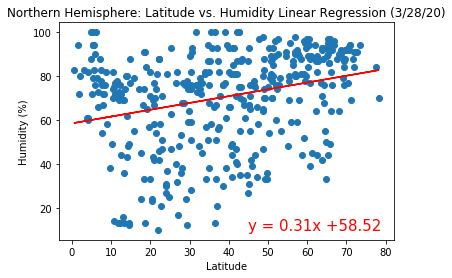

In [137]:
x_values = northern_hem_cities['lat']
y_values = northern_hem_cities['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Latitude vs. Humidity Linear Regression (3/28/20)')

plt.savefig("./Regression-Northern_LatvsHumidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025280846954208187


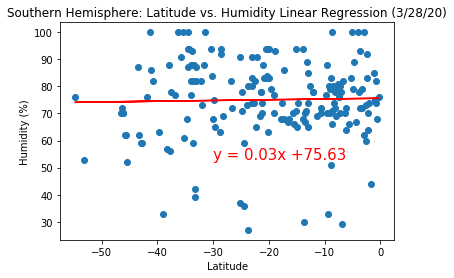

In [140]:
x_values = southern_hem_cities['lat']
y_values = southern_hem_cities['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,53),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Latitude vs. Humidity Linear Regression (3/28/20)')

plt.savefig("./Regression-Southern_LatvsHumidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29630298556184487


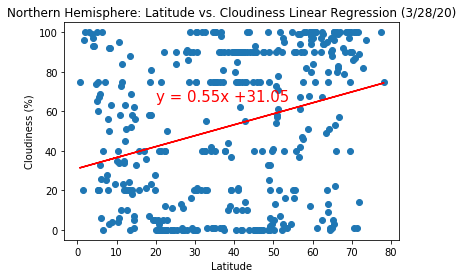

In [141]:
x_values = northern_hem_cities['lat']
y_values = northern_hem_cities['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,65),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness Linear Regression (3/28/20)')

plt.savefig("./Regression-Northern_LatvsCloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17427262247643438


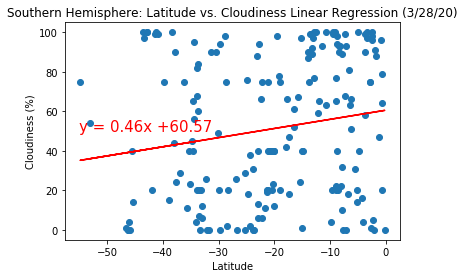

In [133]:
x_values = southern_hem_cities['lat']
y_values = southern_hem_cities['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness Linear Regression (3/28/20)')

plt.savefig("./Regression-Southern_LatvsCloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18744539008112598


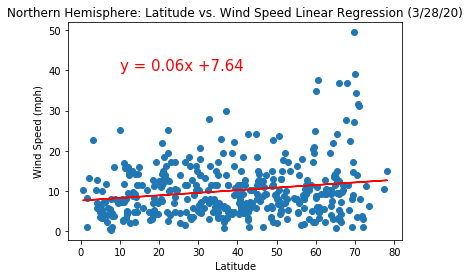

In [134]:
x_values = northern_hem_cities['lat']
y_values = northern_hem_cities['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed Linear Regression (3/28/20)')

plt.savefig("./Regression-Northern_LatvsWindspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.33787746233690724


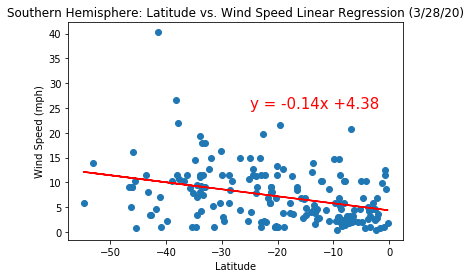

In [142]:
x_values = southern_hem_cities['lat']
y_values = southern_hem_cities['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed Linear Regression (3/28/20)')

plt.savefig("./Regression-Southern_LatvsWindspeed.png")